In [1]:
import pandas as pd
from wavhandler import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import logging
logger = logging.getLogger()
logger.setLevel(logging.WARN)

plt.rcParams['figure.figsize'] = [14, 10]


## Dataframe Overview

In [9]:
df = pd.read_csv('./data/mosquitos.csv', delimiter=';')
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df.sample(10)

,fname,names,class,subclass,date,path_len,fname_len,humidity,temperature,evaluation,0,1,2,3,4,5,ampl_1,ampl_2,ampl_3
245322,F161220_031018_164_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Culex,C. quinquefasciatus,2016-12-20 03:08:37,11,5,NaN,NaN,0,781.25,NaN,NaN,NaN,NaN,NaN,0.026306,0.026001,0.025909
265668,F161220_170106_030_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Culex,C. quinquefasciatus,2016-12-20 17:01:02,11,5,NaN,NaN,1,468.75,968.75,1437.5,NaN,NaN,NaN,0.036774,0.036133,0.035889
168774,F170122_215656_016_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Anopheles,An. gambiae,2017-01-22 21:15:24,11,5,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0.030884,0.030579,0.030457
277530,F161220_222804_116_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Culex,C. quinquefasciatus,2016-12-20 22:26:13,11,5,NaN,NaN,1,406.25,843.75,NaN,NaN,NaN,NaN,0.032471,0.032257,0.032135
220720,F161219_165228_137_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Culex,C. quinquefasciatus,2016-12-19 16:51:15,11,5,NaN,NaN,1,437.50,875.00,NaN,NaN,NaN,NaN,0.027435,0.026917,0.026642
70780,F170211_200847_037_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Aedes,Ae. aegypti,2017-02-11 20:06:05,11,5,NaN,NaN,1,593.75,1156.25,1750.0,NaN,NaN,NaN,0.041809,0.040955,0.040009
10136,F170207_133644_187_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Aedes,Ae. aegypti,2017-02-07 13:36:14,11,5,NaN,NaN,0,593.75,1187.50,NaN,NaN,NaN,NaN,0.021515,0.020996,0.020386
241923,F161220_012102_092_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Culex,C. quinquefasciatus,2016-12-20 01:19:21,11,5,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0.082611,0.081329,0.080658
56133,F170210_190037_199_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Aedes,Ae. aegypti,2017-02-10 18:57:06,11,5,NaN,NaN,1,468.75,968.75,1437.5,1937.5,NaN,NaN,0.024689,0.023926,0.023834
59340,F170210_215626_078_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Aedes,Ae. aegypti,2017-02-10 21:53:22,11,5,NaN,NaN,1,437.50,906.25,1312.5,1750.0,2187.5,NaN,0.063354,0.063293,0.062866


### Examine Individual Signals

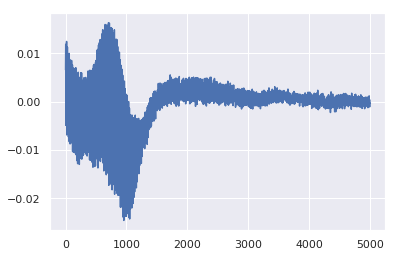

In [4]:
## EXAMINE SIGNAL
all_signal_names = df.set_index('fname').names.tolist()
signal_name = 'F170214_214608_012_G_050_T_25.9_H_62.8' ##
#signal_name = random.choice(all_signal_names).split('/')[-1][:-4]
path_name = [df.set_index('fname').loc[signal_name].names]
signal = read_simple(path_name)[0]
#signal = butter_bandpass_filter(signal, L_CUTOFF, H_CUTOFF, F_S, order=B_ORDER)
plt.plot(signal)

## Frequencies Histograms

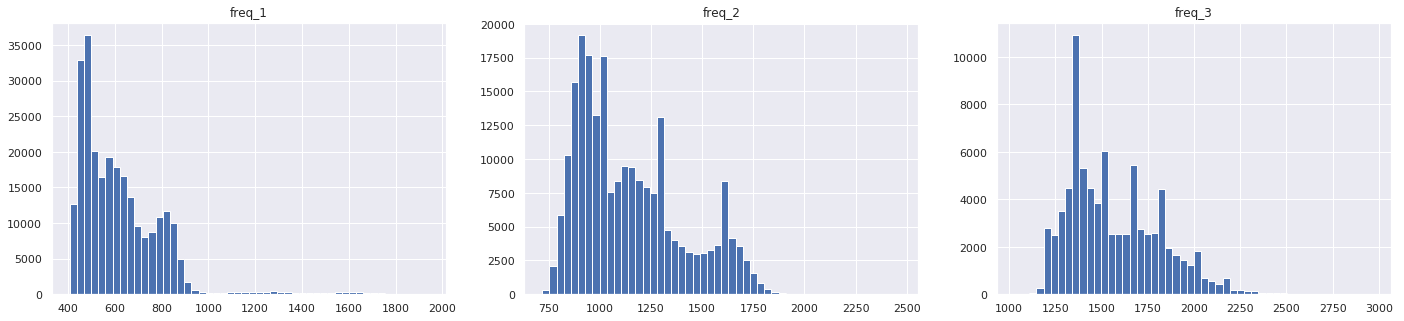

In [5]:
nr_bins = 50
plt.figure(figsize=(24,5))
plt.subplot(1,3,1)
plt.title('freq_1')
df['0'].hist(bins=nr_bins)
plt.subplot(1,3,2)
plt.title('freq_2')
df['1'].hist(bins=nr_bins)
plt.subplot(1,3,3)
plt.title('freq_3')
df['2'].hist(bins=nr_bins)

## Amplitudes Histograms

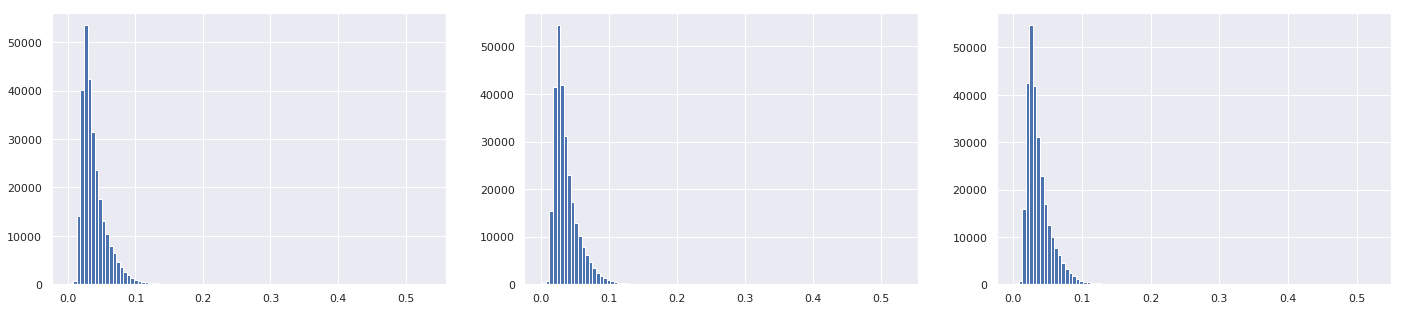

In [6]:
nr_bins = 100
plt.figure(figsize=(24,5))
plt.subplot(1,3,1)
df['ampl_1'].hist(bins=nr_bins)
plt.subplot(1,3,2)
df['ampl_2'].hist(bins=nr_bins)
plt.subplot(1,3,3)
df['ampl_3'].hist(bins=nr_bins)

## Temperature

Percentage of NaNs: 81.33%


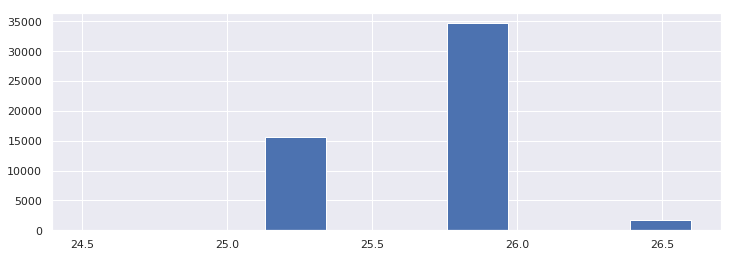

In [7]:
plt.figure(figsize=(12,4))
feature = 'temperature'
df[feature].hist()
print('Percentage of NaNs: {:.2f}%'.format(df[feature].isnull().sum() / df[feature].shape[0] * 100.))

## Humidity

Percentage of NaNs: 81.33%


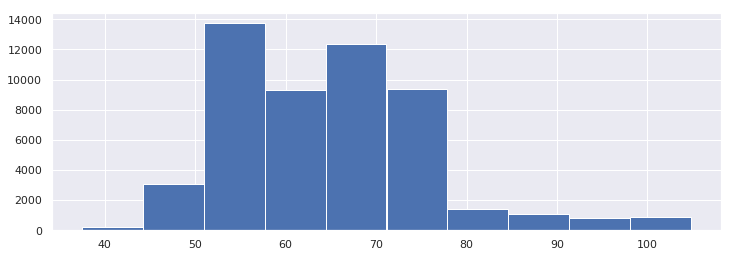

In [8]:
plt.figure(figsize=(12,4))
feature = 'humidity'
df[feature].hist()
print('Percentage of NaNs: {:.2f}%'.format(df[feature].isnull().sum() / df[feature].shape[0] * 100.))